<a href="https://colab.research.google.com/github/shila121/projects/blob/main/a_knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the data
data = pd.read_csv('train_cleaned.csv')
print(data.shape)

(8523, 46)


In [4]:
print(data.head())
print(data.columns)

   Item_Weight  ...  Outlet_Type_Supermarket Type3
0         9.30  ...                              0
1         5.92  ...                              0
2        17.50  ...                              0
3        19.20  ...                              0
4         8.93  ...                              0

[5 rows x 46 columns]
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starc

In [5]:
# segregating dependent and independent variable

x = data.drop(['Item_Outlet_Sales'],axis = 1)
y = data['Item_Outlet_Sales']
print(x.shape,y.shape)

(8523, 45) (8523,)


In [6]:
# scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [7]:
x = pd.DataFrame(x_scaled)

In [8]:
# split train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 56)

In [9]:
# importing regressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse



In [11]:
reg = KNN(n_neighbors=10)
reg.fit(train_x,train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict,test_y)
print('Test MSE ',k)

Test MSE  1622446.6633706575


In [12]:
# elbow curve

def elbow(k):
  test_mse = []
  for i in k:
    reg = KNN(n_neighbors=i)
    reg.fit(train_x,train_y)
    tmp = reg.predict(test_x)
    tmp = mse(tmp,test_y)
    test_mse.append(tmp)
  return test_mse

In [13]:
k = range(1,40)


In [14]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

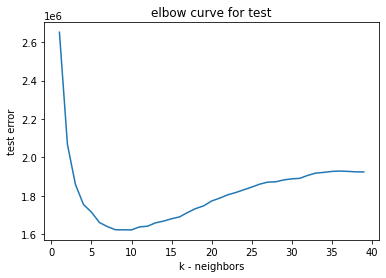

In [15]:
# plot the cureve
plt.plot(k,test)
plt.xlabel('k - neighbors')
plt.ylabel('test error')
plt.title('elbow curve for test')

In [16]:
# n_neighors = 9 is taken

In [17]:
reg = KNN(n_neighbors=9)
reg.fit(train_x,train_y)
test_predict = reg.predict(test_x)
k = mse(test_predict,test_y)
print('Test MSE ',k)

Test MSE  1622957.615752187
